# Glass_Identification_Classification Project


Project Description:
    
The dataset describes the chemical properties of glass and involves classifying samples of glass using their chemical properties as one of six classes. The dataset was credited to Vina Spiehler in 1987. The study of classification of types of glass was motivated by criminological investigation. At the scene of the crime, the glass left can be used as evidence...if it is correctly identified!

The chemical compositions are measured as the weight percent in corresponding oxide.

Attribute Information-
1.	 Id number: 1 to 214
2.	 RI: refractive index
3.	Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
4.	Mg: Magnesium
5.	Al: Aluminum
6.	Si: Silicon
7.	K: Potassium
8.	Ca: Calcium
9.	Ba: Barium
10.	Fe: Iron
11.	Type of glass: (class attribute)
    
•	1- building_windows_float_processed
•	2- building_windows_non_float_processed
•	3- vehicle_windows_float_processed
•	4- vehicle_windows_non_float_processed (none in this database)
•	5- containers
•	6- tableware
•	7- headlamps

There are 214 observations in the dataset. The dataset can be divided into window glass (classes 1-4) and non-window glass (classes 5-7). 
Predict : Type of glass




In [679]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')

In [680]:
df=pd.read_csv('Glass_Identification.csv')
df

,Id number,RI:refractive index,Na:Sodium,Mg:Magnesium,Al:Aluminum,Si:Silicon,K:Potassium,Ca:Calcium,Ba:Barium,Fe:Iron,Type of glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
5,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
6,7,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.00,0.00,1
7,8,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.00,0.00,1
8,9,1.51918,14.04,3.58,1.37,72.08,0.56,8.30,0.00,0.00,1
9,10,1.51755,13.00,3.60,1.36,72.99,0.57,8.40,0.00,0.11,1


In [681]:
df.set_index('Id number', inplace=True) #all Id numbers are unique, either drop this column or set as a index
df

,RI:refractive index,Na:Sodium,Mg:Magnesium,Al:Aluminum,Si:Silicon,K:Potassium,Ca:Calcium,Ba:Barium,Fe:Iron,Type of glass
Id number,,,,,,,,,,
1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00,1
2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
7,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.00,0.00,1
8,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.00,0.00,1
9,1.51918,14.04,3.58,1.37,72.08,0.56,8.30,0.00,0.00,1


In [682]:
df.head(15)

,RI:refractive index,Na:Sodium,Mg:Magnesium,Al:Aluminum,Si:Silicon,K:Potassium,Ca:Calcium,Ba:Barium,Fe:Iron,Type of glass
Id number,,,,,,,,,,
1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.00,1
2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1
7,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.0,0.00,1
8,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.0,0.00,1
9,1.51918,14.04,3.58,1.37,72.08,0.56,8.30,0.0,0.00,1


In [683]:
df.tail(15)

,RI:refractive index,Na:Sodium,Mg:Magnesium,Al:Aluminum,Si:Silicon,K:Potassium,Ca:Calcium,Ba:Barium,Fe:Iron,Type of glass
Id number,,,,,,,,,,
200,1.51609,15.01,0.0,2.51,73.05,0.05,8.83,0.53,0.0,7
201,1.51508,15.15,0.0,2.25,73.50,0.00,8.34,0.63,0.0,7
202,1.51653,11.95,0.0,1.19,75.18,2.70,8.93,0.00,0.0,7
203,1.51514,14.85,0.0,2.42,73.72,0.00,8.39,0.56,0.0,7
204,1.51658,14.80,0.0,1.99,73.11,0.00,8.28,1.71,0.0,7
205,1.51617,14.95,0.0,2.27,73.30,0.00,8.71,0.67,0.0,7
206,1.51732,14.95,0.0,1.80,72.99,0.00,8.61,1.55,0.0,7
207,1.51645,14.94,0.0,1.87,73.11,0.00,8.67,1.38,0.0,7
208,1.51831,14.39,0.0,1.82,72.86,1.41,6.47,2.88,0.0,7


In [684]:
df.keys()

Index(['RI:refractive index', 'Na:Sodium', 'Mg:Magnesium', 'Al:Aluminum',
       'Si:Silicon', 'K:Potassium', 'Ca:Calcium', 'Ba:Barium', 'Fe:Iron',
       'Type of glass'],
      dtype='object')

In [685]:
df.sample(5)

,RI:refractive index,Na:Sodium,Mg:Magnesium,Al:Aluminum,Si:Silicon,K:Potassium,Ca:Calcium,Ba:Barium,Fe:Iron,Type of glass
Id number,,,,,,,,,,
67,1.52152,13.05,3.65,0.87,72.22,0.19,9.85,0.0,0.17,1
108,1.53393,12.30,0.00,1.00,70.16,0.12,16.19,0.0,0.24,2
97,1.51841,13.02,3.62,1.06,72.34,0.64,9.13,0.0,0.15,2
120,1.51652,13.56,3.57,1.47,72.45,0.64,7.96,0.0,0.00,2
127,1.51667,12.94,3.61,1.26,72.75,0.56,8.60,0.0,0.00,2


In [686]:
df.isnull().sum() # checking the null values in each column

RI:refractive index    0
Na:Sodium              0
Mg:Magnesium           0
Al:Aluminum            0
Si:Silicon             0
K:Potassium            0
Ca:Calcium             0
Ba:Barium              0
Fe:Iron                0
Type of glass          0
dtype: int64

In [687]:
df.isnull().sum().sum()

0

In [688]:
df.dtypes

RI:refractive index    float64
Na:Sodium              float64
Mg:Magnesium           float64
Al:Aluminum            float64
Si:Silicon             float64
K:Potassium            float64
Ca:Calcium             float64
Ba:Barium              float64
Fe:Iron                float64
Type of glass            int64
dtype: object

In [689]:
# checking the value counts of each column
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

1.52152    3
1.51590    3
1.51645    3
1.51754    2
1.51841    2
1.51674    2
1.51768    2
1.51655    2
1.51811    2
1.52213    2
1.51779    2
1.51610    2
1.51646    2
1.51640    2
1.51623    2
1.51613    2
1.51769    2
1.51969    2
1.51905    2
1.52172    2
1.51514    2
1.51793    2
1.51593    2
1.51711    2
1.51618    2
1.51761    2
1.51763    2
1.52177    2
1.51596    2
1.51743    2
1.51784    2
1.51829    2
1.51755    2
1.51667    1
1.51694    1
1.52121    1
1.51872    1
1.51776    1
1.51665    1
1.51796    1
1.51707    1
1.52127    1
1.51643    1
1.51806    1
1.52081    1
1.52068    1
1.51670    1
1.51839    1
1.52020    1
1.52614    1
1.51660    1
1.51709    1
1.51813    1
1.51800    1
1.51832    1
1.51851    1
1.51690    1
1.51789    1
1.51662    1
1.52101    1
1.51934    1
1.51531    1
1.52247    1
1.52365    1
1.51602    1
1.51719    1
1.51683    1
1.51545    1
1.51556    1
1.51727    1
1.51609    1
1.52211    1
1.51508    1
1.51653    1
1.51658    1
1.51617    1
1.51732    1

In [690]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 214 entries, 1 to 214
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   RI:refractive index  214 non-null    float64
 1   Na:Sodium            214 non-null    float64
 2   Mg:Magnesium         214 non-null    float64
 3   Al:Aluminum          214 non-null    float64
 4   Si:Silicon           214 non-null    float64
 5   K:Potassium          214 non-null    float64
 6   Ca:Calcium           214 non-null    float64
 7   Ba:Barium            214 non-null    float64
 8   Fe:Iron              214 non-null    float64
 9   Type of glass        214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 18.4 KB


In [691]:
df.shape

(214, 10)

In [692]:
df.nunique().to_frame("no. of unique values")

,no. of unique values
RI:refractive index,178
Na:Sodium,142
Mg:Magnesium,94
Al:Aluminum,118
Si:Silicon,133
K:Potassium,65
Ca:Calcium,143
Ba:Barium,34
Fe:Iron,32
Type of glass,6


In [693]:
 pd.set_option('display.max_rows',None) #allow to display all rows of a DataFrame without any truncation

In [694]:
df["Type of glass"]

Id number
1      1
2      1
3      1
4      1
5      1
6      1
7      1
8      1
9      1
10     1
11     1
12     1
13     1
14     1
15     1
16     1
17     1
18     1
19     1
20     1
21     1
22     1
23     1
24     1
25     1
26     1
27     1
28     1
29     1
30     1
31     1
32     1
33     1
34     1
35     1
36     1
37     1
38     1
39     1
40     1
41     1
42     1
43     1
44     1
45     1
46     1
47     1
48     1
49     1
50     1
51     1
52     1
53     1
54     1
55     1
56     1
57     1
58     1
59     1
60     1
61     1
62     1
63     1
64     1
65     1
66     1
67     1
68     1
69     1
70     1
71     2
72     2
73     2
74     2
75     2
76     2
77     2
78     2
79     2
80     2
81     2
82     2
83     2
84     2
85     2
86     2
87     2
88     2
89     2
90     2
91     2
92     2
93     2
94     2
95     2
96     2
97     2
98     2
99     2
100    2
101    2
102    2
103    2
104    2
105    2
106    2
107    2
108    2
109    2
110    2


In [695]:
# checking the duplicate values
df.duplicated().sum()

1

In [696]:
duplicated_rows = df.duplicated()
print(df[duplicated_rows])

           RI:refractive index  Na:Sodium  Mg:Magnesium  Al:Aluminum  \
Id number                                                              
40                     1.52213      14.21          3.82         0.47   

           Si:Silicon  K:Potassium  Ca:Calcium  Ba:Barium  Fe:Iron  \
Id number                                                            
40              71.77         0.11        9.57        0.0      0.0   

           Type of glass  
Id number                 
40                     1  


In [697]:
df.drop_duplicates(inplace=True)    # dropping the duplicated row from the dataset

In [698]:
df.nunique().to_frame("no. of unique values")

,no. of unique values
RI:refractive index,178
Na:Sodium,142
Mg:Magnesium,94
Al:Aluminum,118
Si:Silicon,133
K:Potassium,65
Ca:Calcium,143
Ba:Barium,34
Fe:Iron,32
Type of glass,6


In [699]:
# again checking the duplicate values
df.duplicated().sum()

0

In [700]:
# describe the dataset- give the satistical summary 
df.describe()

,RI:refractive index,Na:Sodium,Mg:Magnesium,Al:Aluminum,Si:Silicon,K:Potassium,Ca:Calcium,Ba:Barium,Fe:Iron,Type of glass
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,1.518348,13.404085,2.679202,1.449484,72.655070,0.498873,8.954085,0.175869,0.057277,2.788732
std,0.003033,0.816662,1.443691,0.495925,0.773998,0.653185,1.425882,0.498245,0.097589,2.105130
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516520,12.900000,2.090000,1.190000,72.280000,0.130000,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.560000,8.600000,0.000000,0.000000,2.000000
75%,1.519150,13.810000,3.600000,1.630000,73.090000,0.610000,9.150000,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


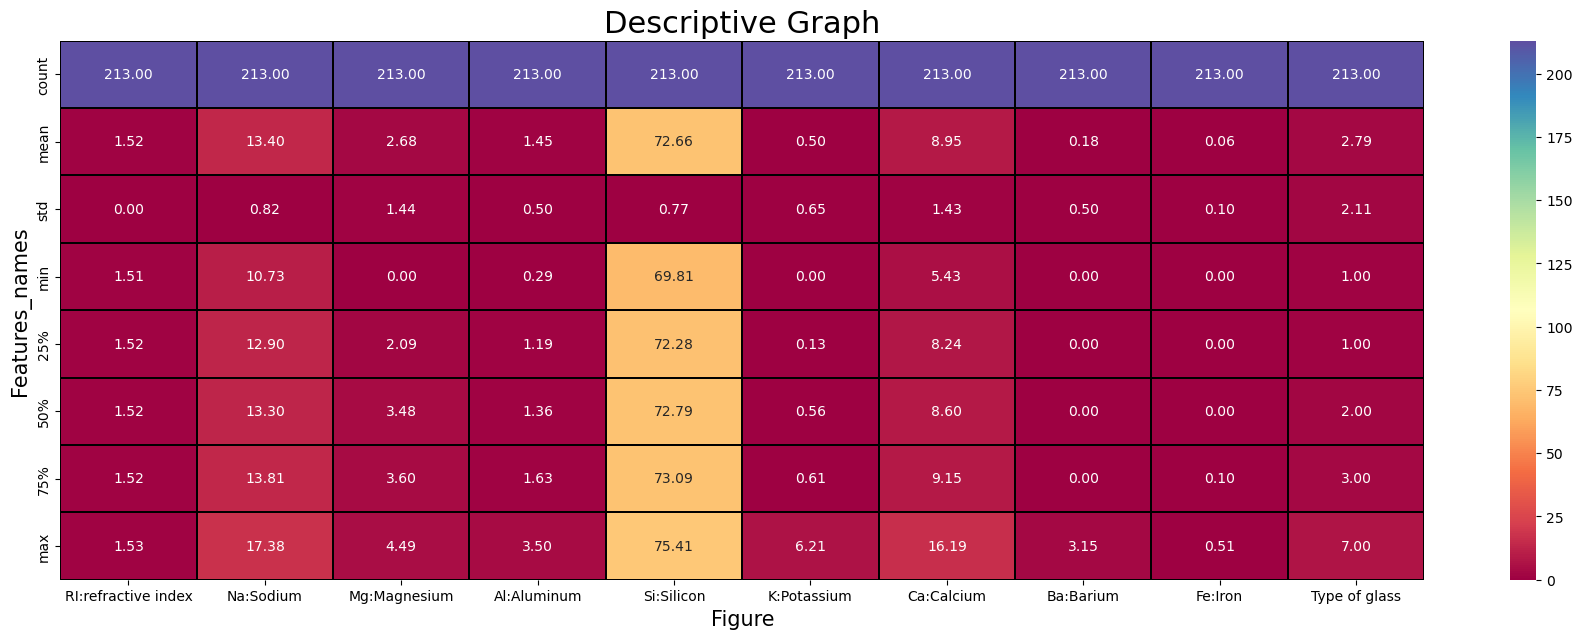

In [701]:
plt.figure(figsize=(22,7))
sns.heatmap(df.describe(),annot=True,fmt='0.2f',linewidth=0.2,linecolor='black',cmap='Spectral')
plt.xlabel('Figure',fontsize=15)
plt.ylabel('Features_names',fontsize=15)
plt.title('Descriptive Graph',fontsize=22)
plt.show()

Observation: Difference between 75% and Max are there. so outliers are present.
Mostly positive skewness also present
    

In [702]:
df.corr()

,RI:refractive index,Na:Sodium,Mg:Magnesium,Al:Aluminum,Si:Silicon,K:Potassium,Ca:Calcium,Ba:Barium,Fe:Iron,Type of glass
RI:refractive index,1.000000,-0.198802,-0.127526,-0.400973,-0.539000,-0.287645,0.811183,0.001679,0.147083,-0.160140
Na:Sodium,-0.198802,1.000000,-0.278420,0.167735,-0.064885,-0.264158,-0.278194,0.329080,-0.239374,0.508837
Mg:Magnesium,-0.127526,-0.278420,1.000000,-0.479575,-0.162437,0.007617,-0.446197,-0.491818,0.085426,-0.744195
Al:Aluminum,-0.400973,0.167735,-0.479575,1.000000,-0.016195,0.323683,-0.258068,0.480642,-0.080583,0.597432
Si:Silicon,-0.539000,-0.064885,-0.162437,-0.016195,1.000000,-0.197281,-0.207145,-0.104389,-0.097717,0.147725
K:Potassium,-0.287645,-0.264158,0.007617,0.323683,-0.197281,1.000000,-0.317032,-0.043653,-0.009372,-0.012455
Ca:Calcium,0.811183,-0.278194,-0.446197,-0.258068,-0.207145,-0.317032,1.000000,-0.112208,0.126314,0.002677
Ba:Barium,0.001679,0.329080,-0.491818,0.480642,-0.104389,-0.043653,-0.112208,1.000000,-0.059729,0.574896
Fe:Iron,0.147083,-0.239374,0.085426,-0.080583,-0.097717,-0.009372,0.126314,-0.059729,1.000000,-0.191090
Type of glass,-0.160140,0.508837,-0.744195,0.597432,0.147725,-0.012455,0.002677,0.574896,-0.191090,1.000000


<Axes: >

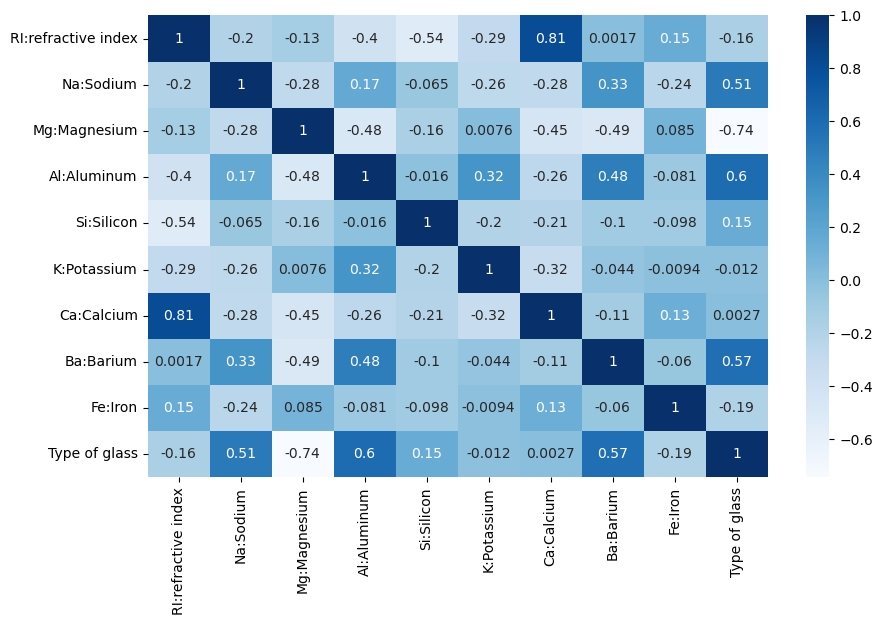

In [703]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), cmap="Blues", annot=True)

Observation :
    1. maximum negative correlated value w.r.t. label is -0.74 and Iron. but we can't drop the Mg:Magnesium feature because of more impact on type of glass
  
    

In [704]:
corrmatrix=df.corr()
corrmatrix['Type of glass'].sort_values(ascending=False)

Type of glass          1.000000
Al:Aluminum            0.597432
Ba:Barium              0.574896
Na:Sodium              0.508837
Si:Silicon             0.147725
Ca:Calcium             0.002677
K:Potassium           -0.012455
RI:refractive index   -0.160140
Fe:Iron               -0.191090
Mg:Magnesium          -0.744195
Name: Type of glass, dtype: float64

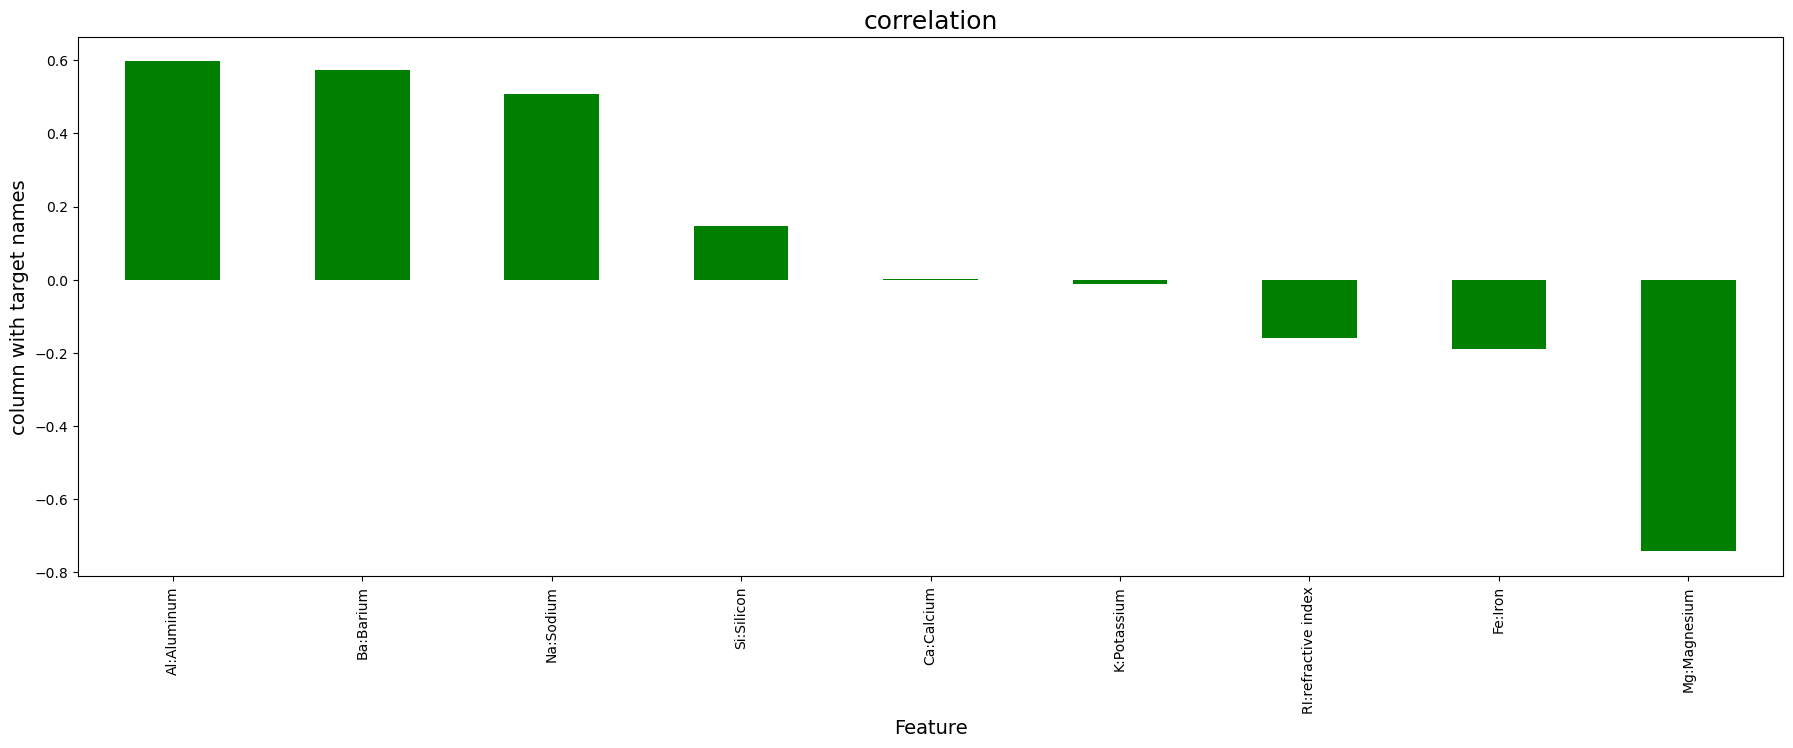

In [705]:
plt.figure(figsize=(22,7))
df.corr()['Type of glass'].sort_values(ascending=False).drop(['Type of glass']).plot(kind='bar',color='green')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

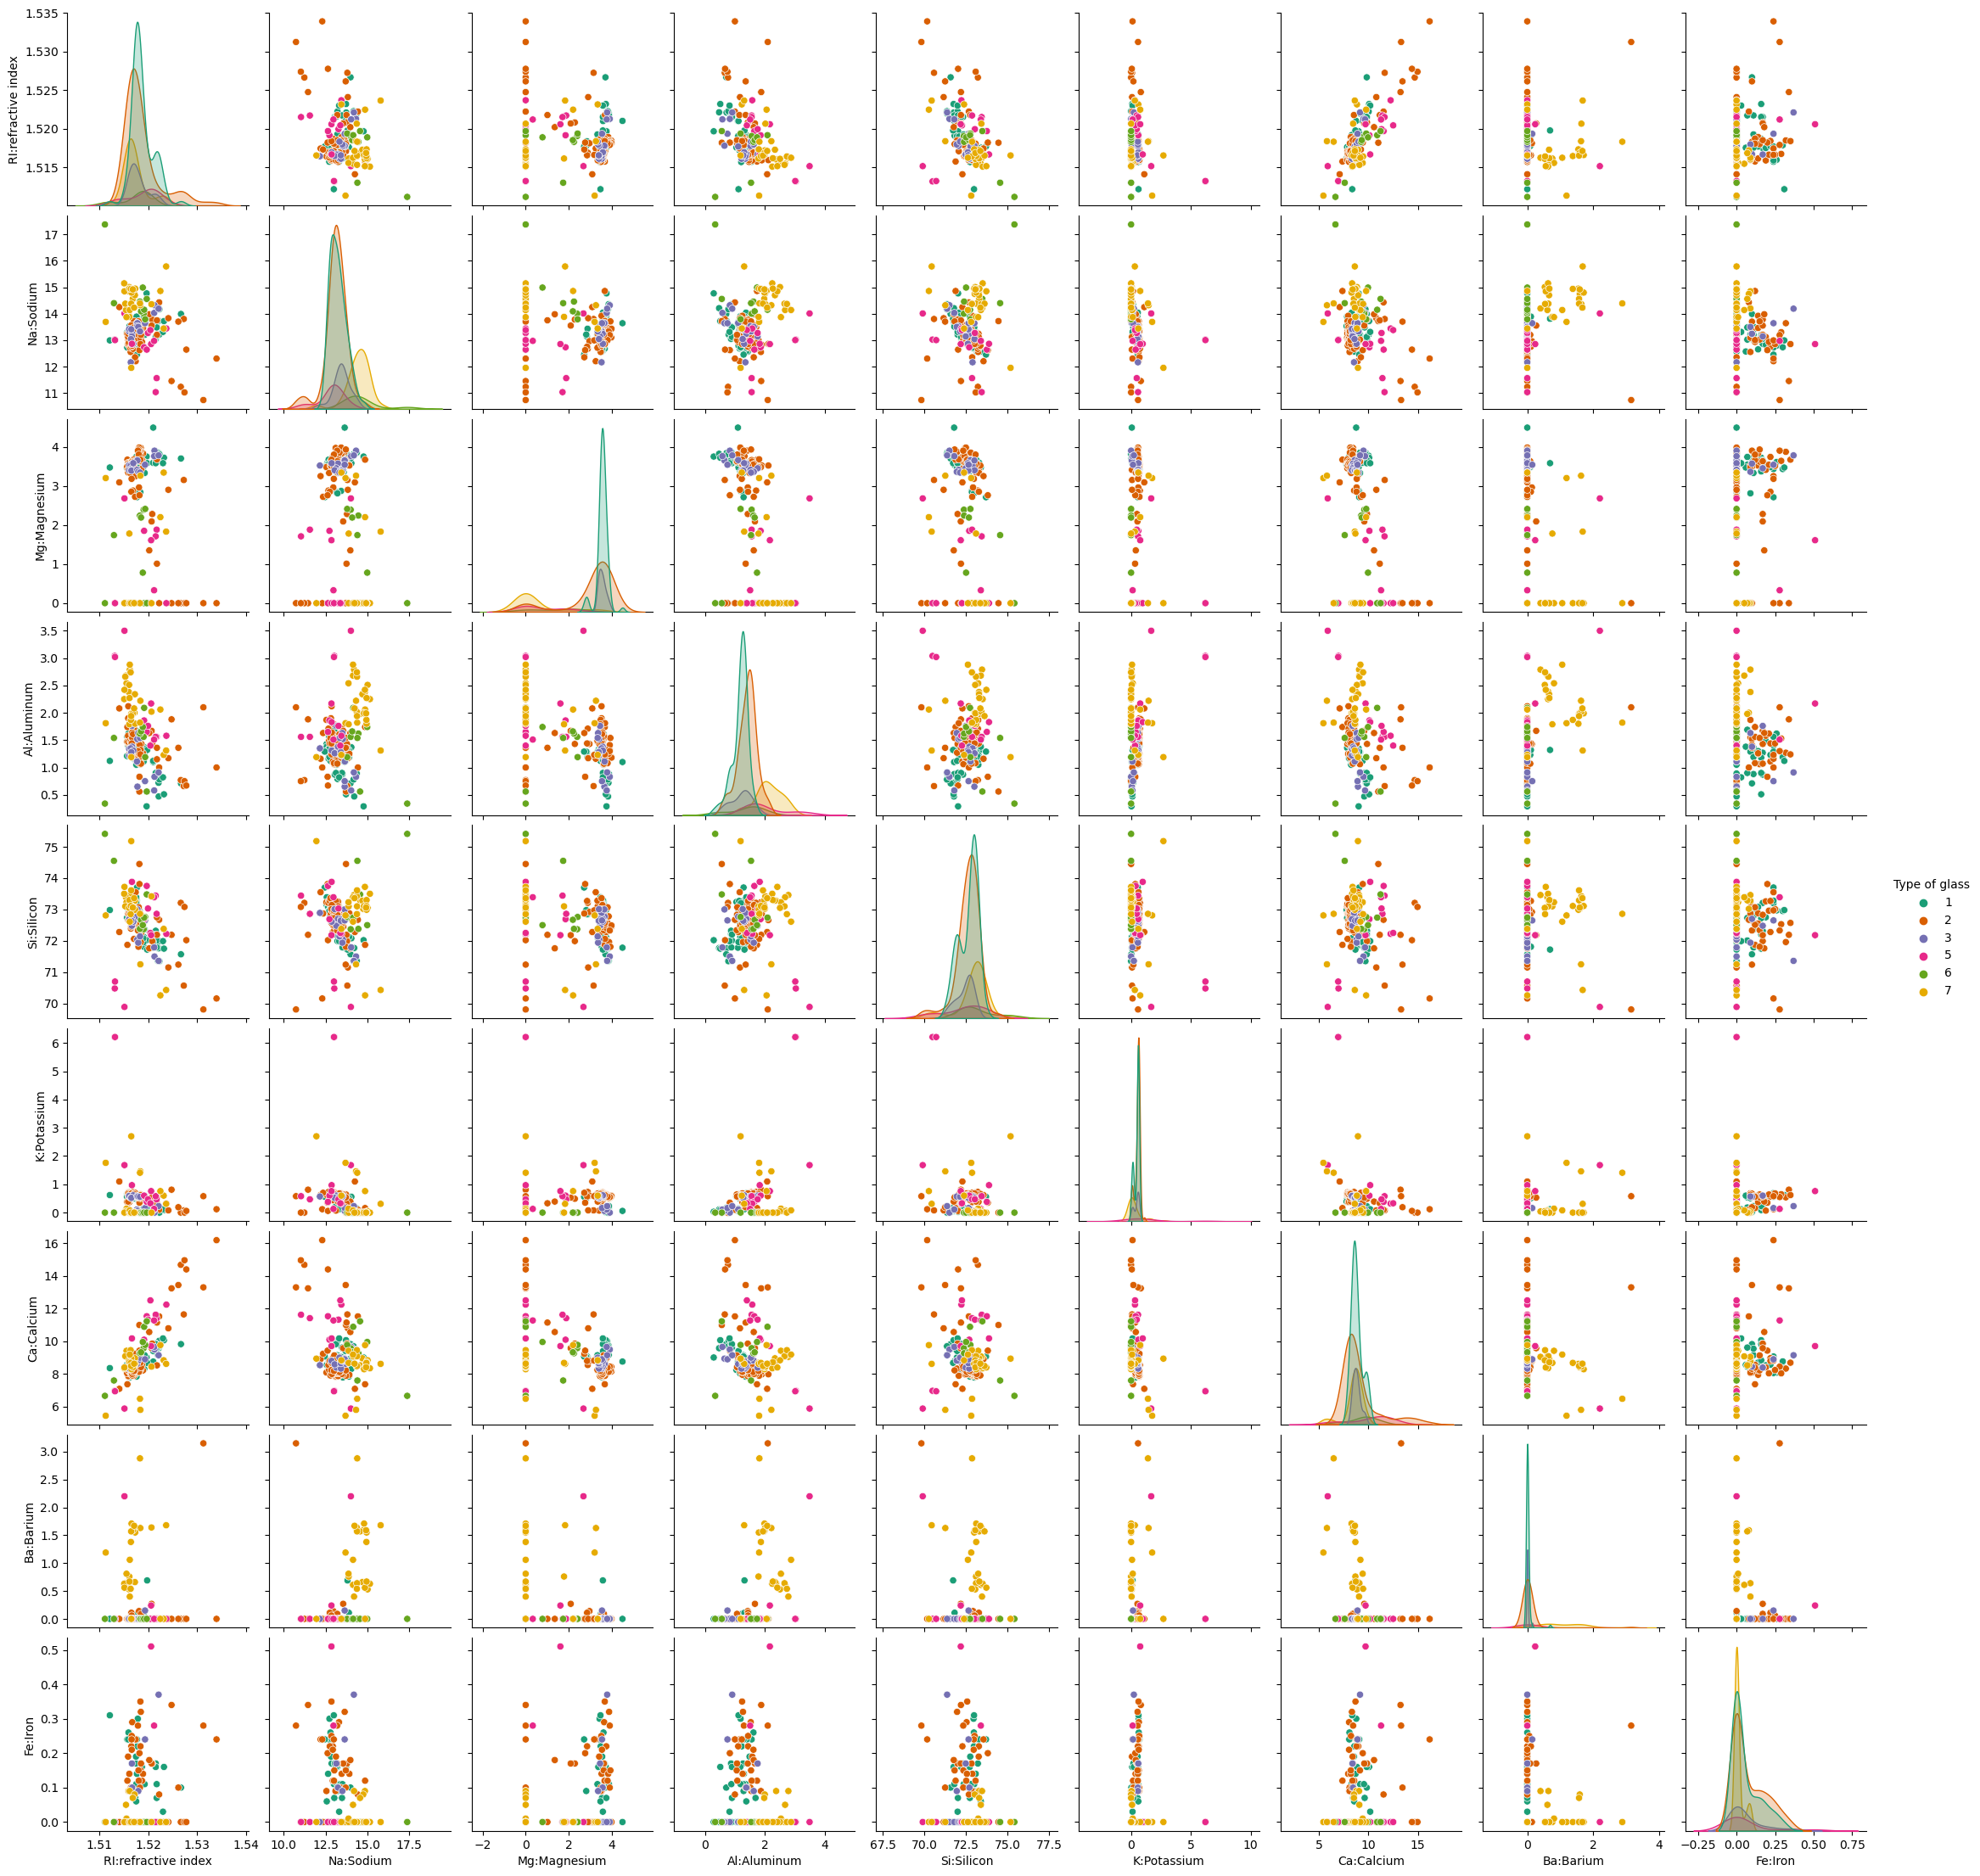

In [ ]:
sns.pairplot(df,hue="Type of glass",palette="Dark2")
plt.show()

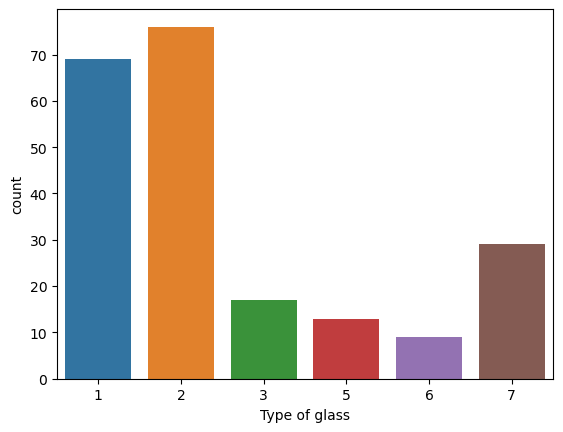

In [707]:
a= sns.countplot(x='Type of glass',data=df)

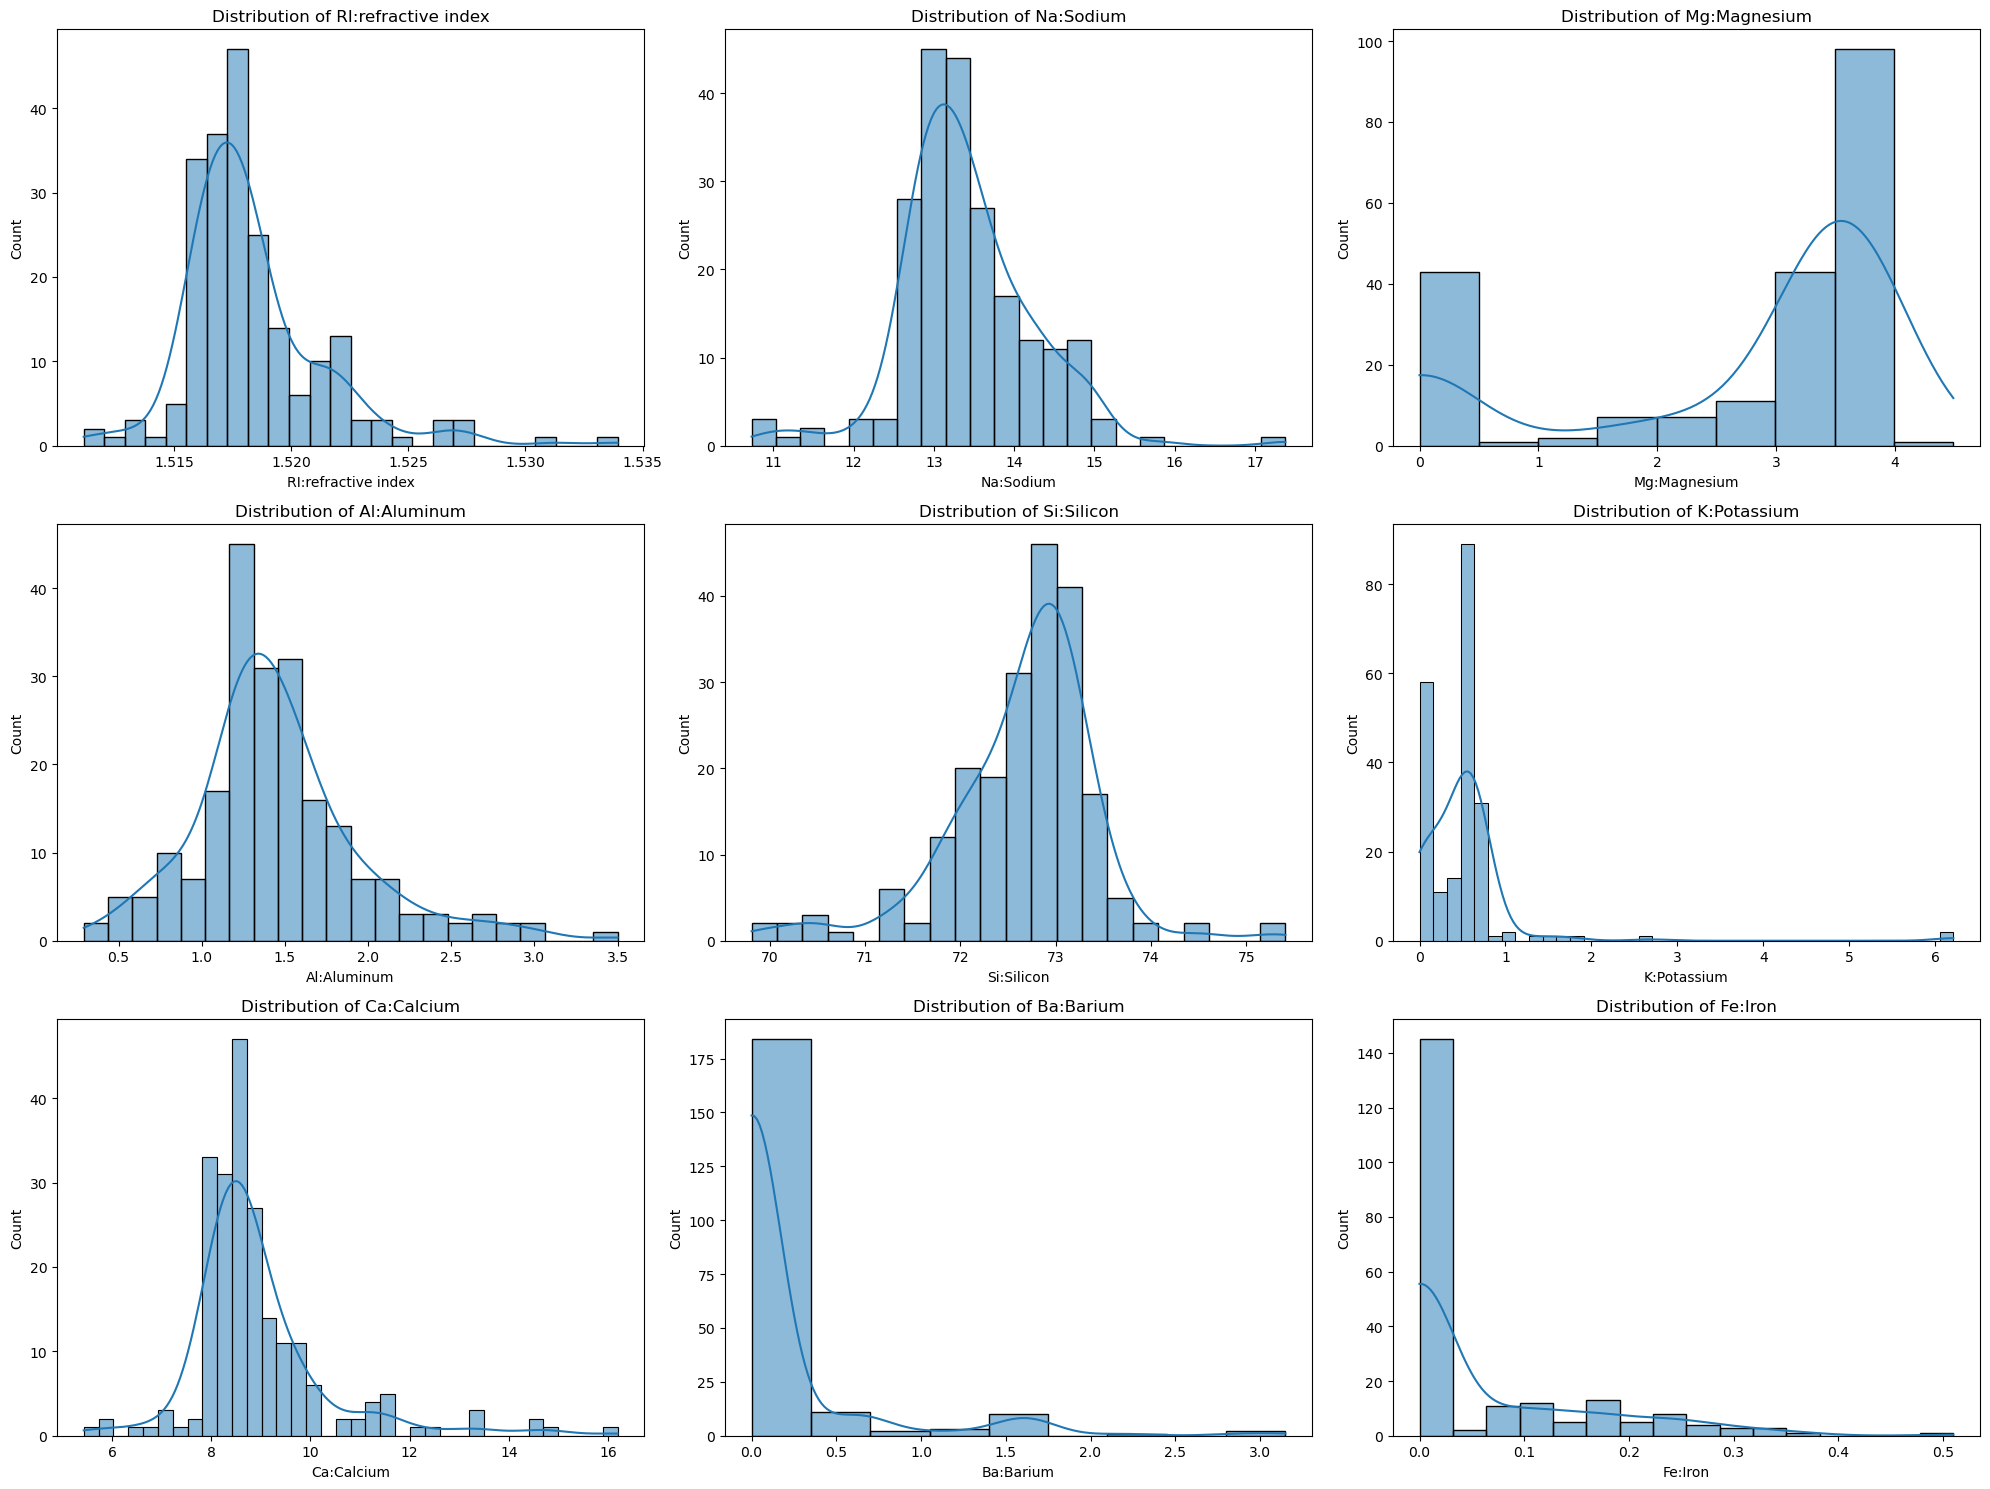

In [708]:
features = ['RI:refractive index', 'Na:Sodium', 'Mg:Magnesium', 'Al:Aluminum', 'Si:Silicon', 'K:Potassium', 'Ca:Calcium', 'Ba:Barium', 'Fe:Iron']

plt.figure(figsize=(20, 15))
plotnumber=1
for i in df.columns:
    if plotnumber<=9:
        plt.subplot(3, 3, plotnumber)
        sns.histplot(df[i], kde=True)
        plt.title(f'Distribution of {i}')
        plt.xlabel(i)
    plotnumber+=1
plt.tight_layout()
plt.show()



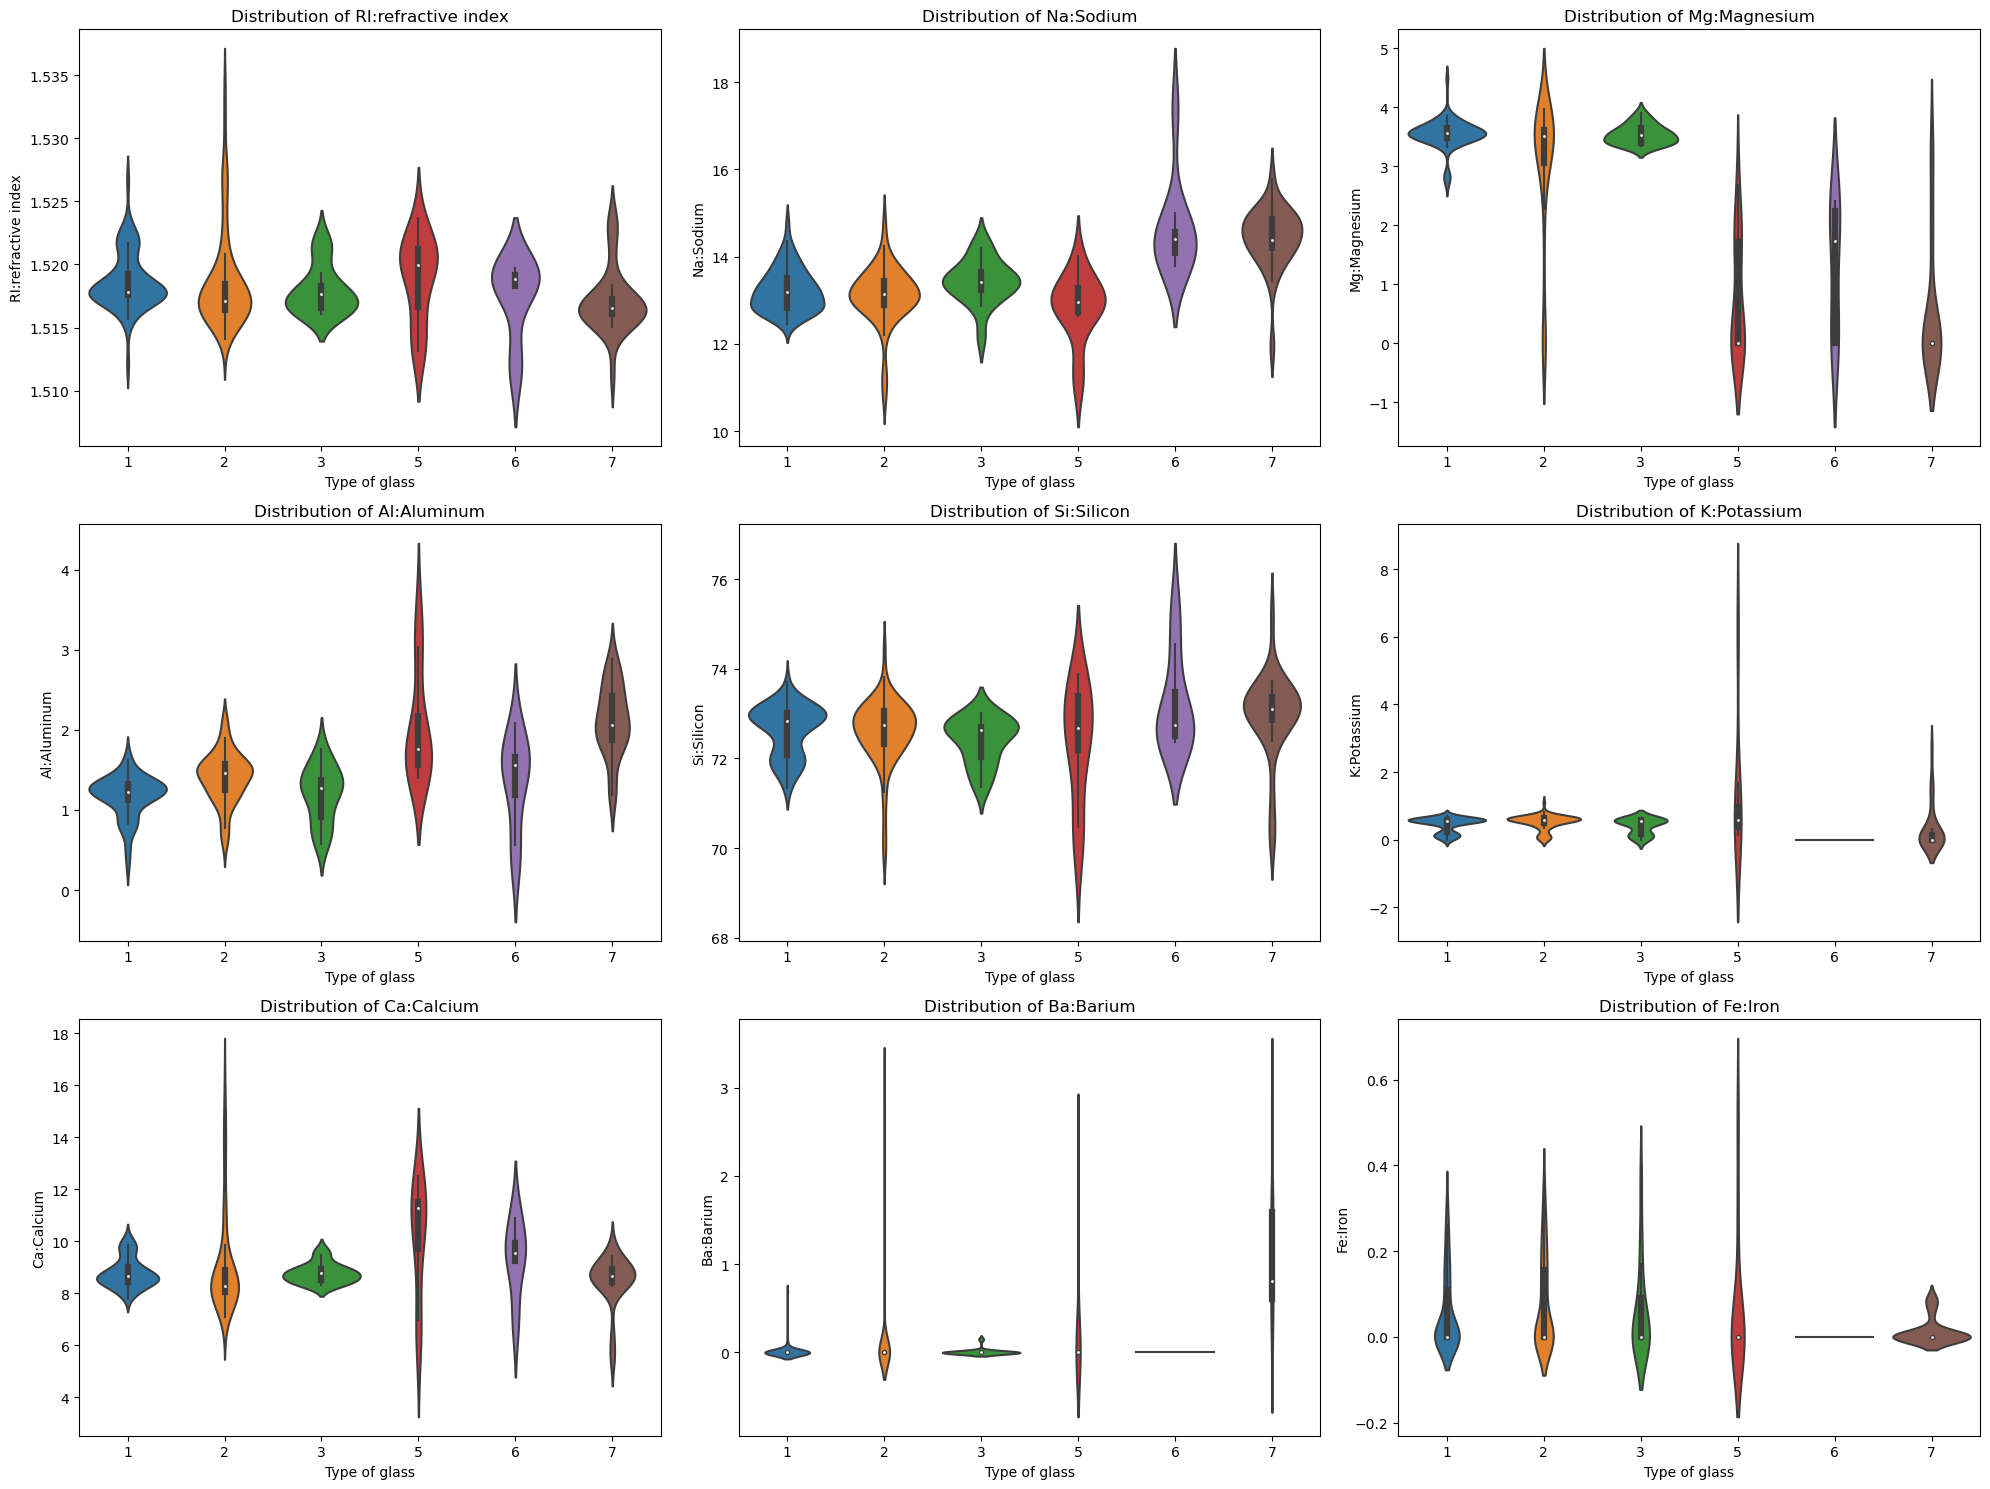

In [709]:

features = ['RI:refractive index', 'Na:Sodium', 'Mg:Magnesium', 'Al:Aluminum', 'Si:Silicon', 'K:Potassium', 'Ca:Calcium', 'Ba:Barium', 'Fe:Iron']

plt.figure(figsize=(20, 15))
plotnumber=1
for i in df.columns:
    if plotnumber<=9:
        plt.subplot(3, 3, plotnumber)
        sns.violinplot(x="Type of glass",y=i,data=df)
        plt.title(f'Distribution of {i}')
        #plt.xlabel()
    plotnumber+=1
plt.tight_layout()
plt.show()



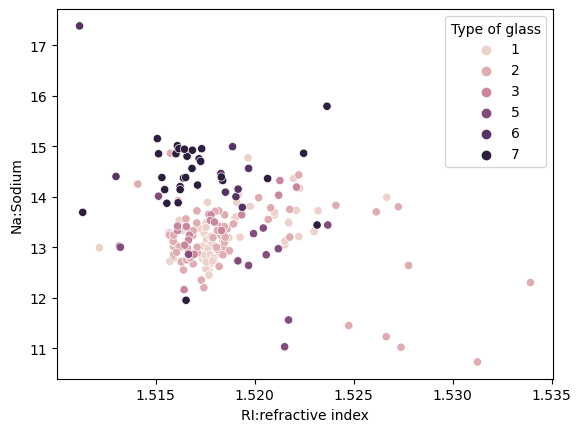

In [710]:
sns.scatterplot(x='RI:refractive index', y='Na:Sodium', hue='Type of glass', data=df)
plt.show()

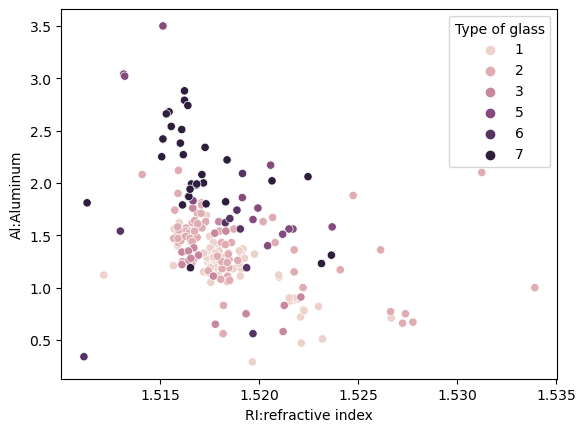

In [711]:
sns.scatterplot(x='RI:refractive index', y='Al:Aluminum', hue='Type of glass', data=df)
plt.show()

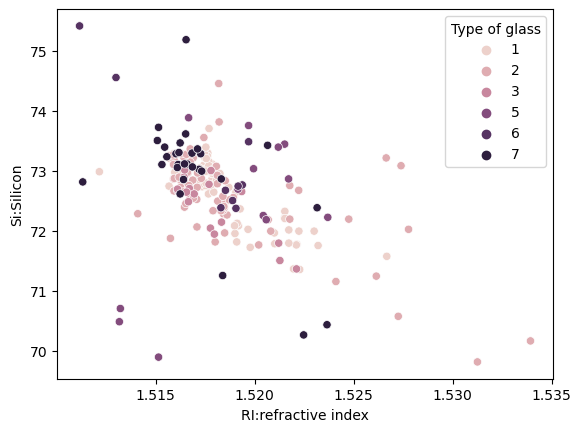

In [712]:
sns.scatterplot(x='RI:refractive index', y='Si:Silicon', hue='Type of glass', data=df)
plt.show()

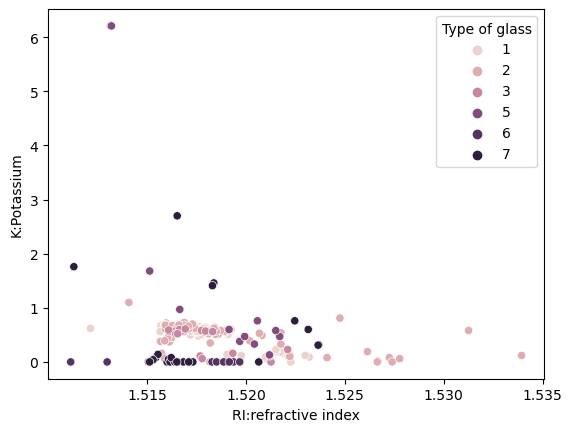

In [713]:
sns.scatterplot(x='RI:refractive index', y='K:Potassium', hue='Type of glass', data=df)
plt.show()

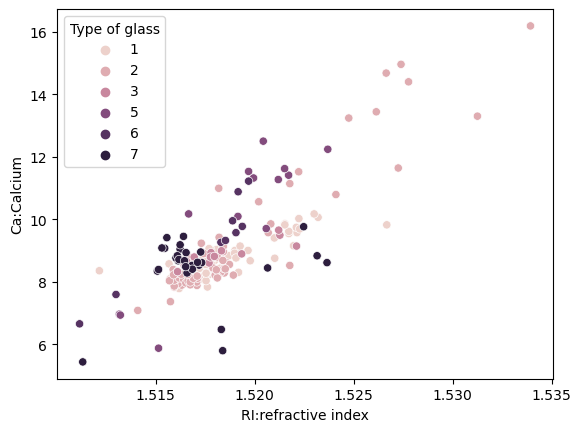

In [714]:
sns.scatterplot(x='RI:refractive index', y='Ca:Calcium', hue='Type of glass', data=df)
plt.show()

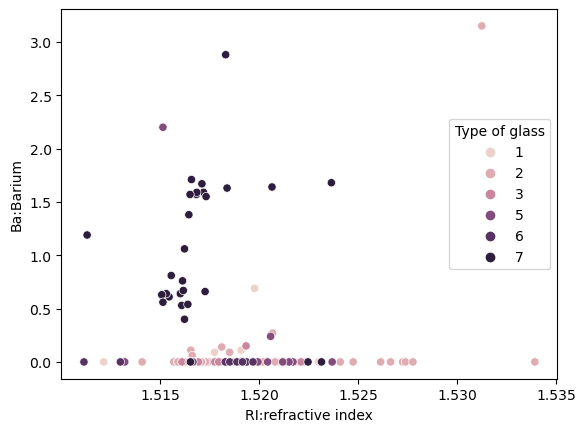

In [715]:
sns.scatterplot(x='RI:refractive index', y='Ba:Barium', hue='Type of glass', data=df)
plt.show()

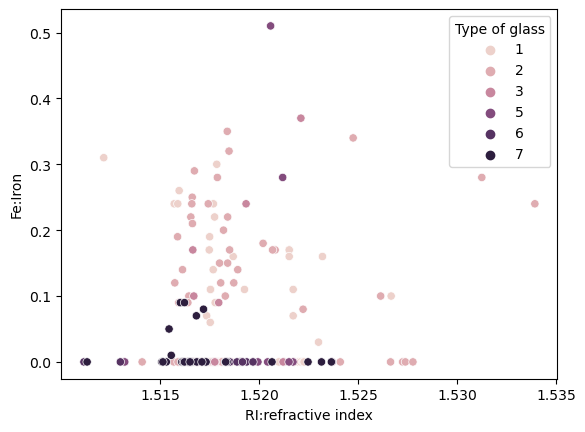

In [716]:
sns.scatterplot(x='RI:refractive index', y='Fe:Iron', hue='Type of glass', data=df)
plt.show()

<Axes: >

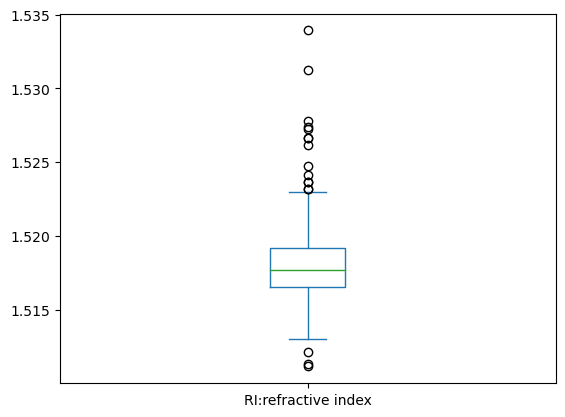

In [717]:
# checking the outliers 
df["RI:refractive index"].plot.box()

<Axes: >

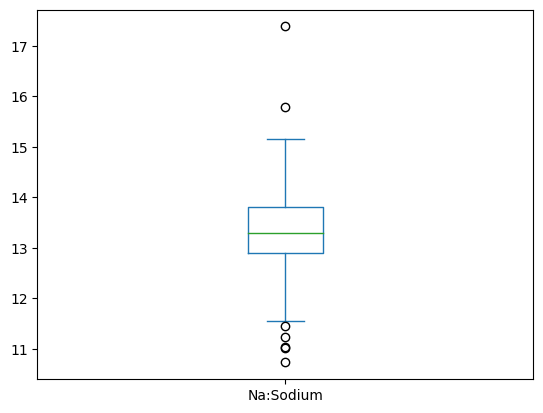

In [718]:
df["Na:Sodium"].plot.box()

<Axes: >

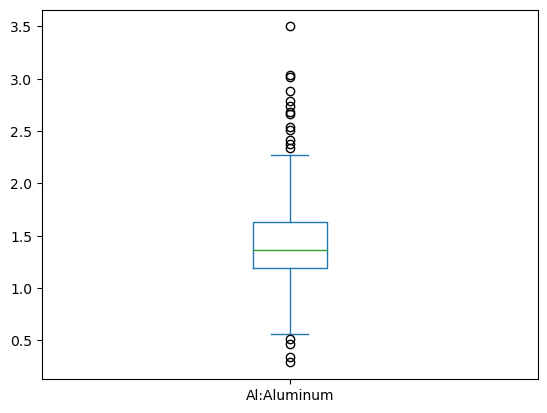

In [719]:
df["Al:Aluminum"].plot.box()

<Axes: >

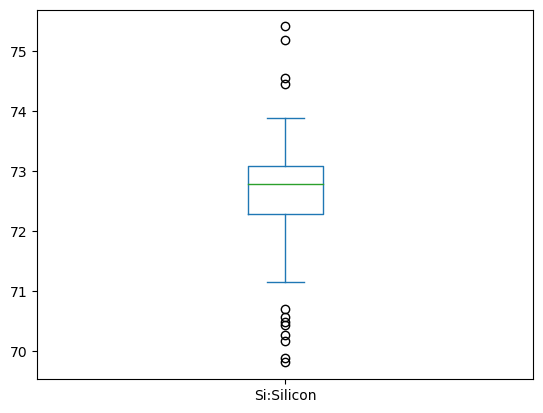

In [720]:
df["Si:Silicon"].plot.box()

<Axes: >

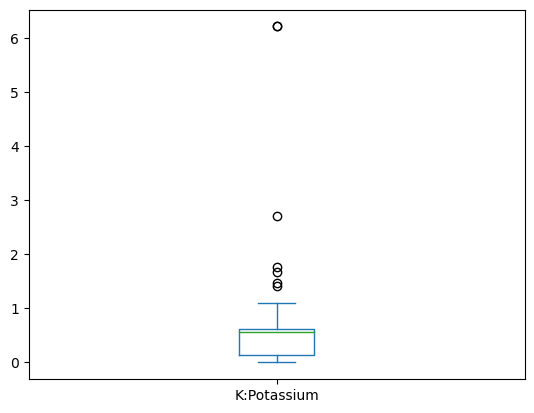

In [721]:
df['K:Potassium'].plot.box()

<Axes: >

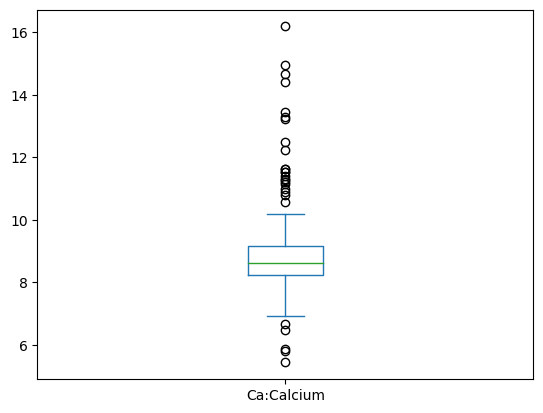

In [722]:
df['Ca:Calcium'].plot.box()

<Axes: >

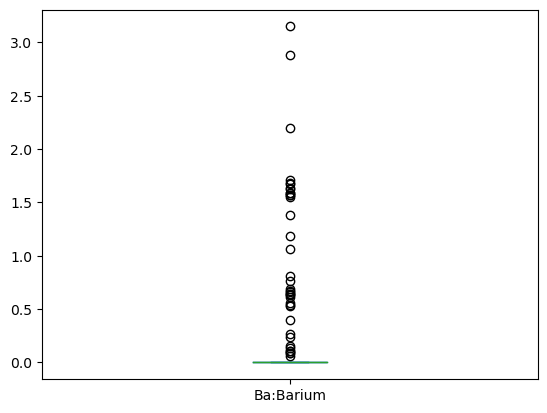

In [723]:
df['Ba:Barium'].plot.box()

<Axes: >

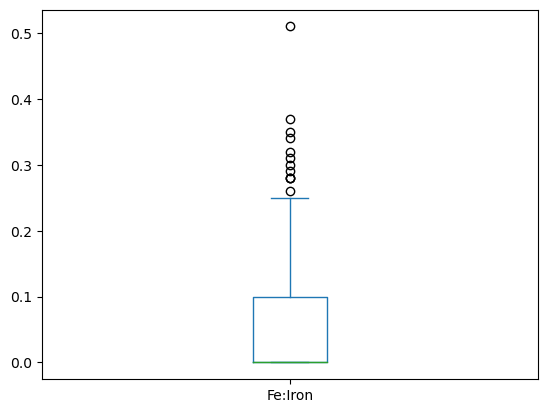

In [724]:
df['Fe:Iron'].plot.box()

In [725]:
#we have to drop the K:Potassium, barium and Fe:Iron because of mostly outliers are present and also prest in very small quantities (oftenly less than 1%)
df.drop(["K:Potassium"],axis=1,inplace=True)
df.drop(["Ba:Barium"],axis=1,inplace=True)
df.drop(["Fe:Iron"],axis=1,inplace=True)

In [726]:
df

,RI:refractive index,Na:Sodium,Mg:Magnesium,Al:Aluminum,Si:Silicon,Ca:Calcium,Type of glass
Id number,,,,,,,
1,1.52101,13.64,4.49,1.10,71.78,8.75,1
2,1.51761,13.89,3.60,1.36,72.73,7.83,1
3,1.51618,13.53,3.55,1.54,72.99,7.78,1
4,1.51766,13.21,3.69,1.29,72.61,8.22,1
5,1.51742,13.27,3.62,1.24,73.08,8.07,1
6,1.51596,12.79,3.61,1.62,72.97,8.07,1
7,1.51743,13.30,3.60,1.14,73.09,8.17,1
8,1.51756,13.15,3.61,1.05,73.24,8.24,1
9,1.51918,14.04,3.58,1.37,72.08,8.30,1


In [727]:
df.skew()

RI:refractive index    1.648017
Na:Sodium              0.465699
Mg:Magnesium          -1.146096
Al:Aluminum            0.938402
Si:Silicon            -0.744646
Ca:Calcium             2.050752
Type of glass          1.108861
dtype: float64

In [728]:
# removing the Skewness using cube root
df["Ca:Calcium"]=np.cbrt(df["Ca:Calcium"])
df["Al:Aluminum"]=np.cbrt(df["Al:Aluminum"])

In [729]:
df.skew()

RI:refractive index    1.648017
Na:Sodium              0.465699
Mg:Magnesium          -1.146096
Al:Aluminum           -0.166278
Si:Silicon            -0.744646
Ca:Calcium             1.413168
Type of glass          1.108861
dtype: float64

# Removing the Outliers

In [730]:
from scipy.stats import zscore

# removing the outliers
z=np.abs(zscore(df))
z

,RI:refractive index,Na:Sodium,Mg:Magnesium,Al:Aluminum,Si:Silicon,Ca:Calcium,Type of glass
Id number,,,,,,,
1,0.879840,0.289558,1.257238,0.655347,1.133248,0.105106,0.851703
2,0.243816,0.596403,0.639311,0.070377,0.097037,0.837743,0.851703
3,0.716412,0.154546,0.604596,0.292031,0.433746,0.879169,0.851703
4,0.227291,0.238216,0.701798,0.219957,0.058368,0.520515,0.851703
5,0.306608,0.164573,0.653197,0.330145,0.550299,0.641313,0.851703
6,0.789119,0.753716,0.646254,0.444050,0.407845,0.641313,0.851703
7,0.303303,0.127751,0.639311,0.559745,0.563250,0.560616,0.851703
8,0.260340,0.311858,0.646254,0.778167,0.757505,0.504520,0.851703
9,0.275049,0.780510,0.625425,0.049431,0.744737,0.456689,0.851703


In [731]:
threshold=3
print(np.where(z>3))


(array([ 21, 105, 105, 105, 106, 106, 106, 109, 110, 111, 111, 162, 162,
       183, 183, 183, 184, 187, 200]), array([3, 0, 1, 4, 0, 4, 5, 5, 5, 0, 5, 3, 4, 1, 3, 4, 5, 4, 4]))


In [732]:
df_new=df[(z<3).all(axis=1)]
df_new

,RI:refractive index,Na:Sodium,Mg:Magnesium,Al:Aluminum,Si:Silicon,Ca:Calcium,Type of glass
Id number,,,,,,,
1,1.52101,13.64,4.49,1.032280,71.78,2.060643,1
2,1.51761,13.89,3.60,1.107932,72.73,1.985732,1
3,1.51618,13.53,3.55,1.154800,72.99,1.981496,1
4,1.51766,13.21,3.69,1.088587,72.61,2.018168,1
5,1.51742,13.27,3.62,1.074337,73.08,2.005816,1
6,1.51596,12.79,3.61,1.174460,72.97,2.005816,1
7,1.51743,13.30,3.60,1.044644,73.09,2.014067,1
8,1.51756,13.15,3.61,1.016396,73.24,2.019803,1
9,1.51918,14.04,3.58,1.110641,72.08,2.024694,1


In [733]:
# data loss percentage
print("Data Loss Percentage",((df.shape[0]-df_new.shape[0])/df.shape[0])*100)

Data Loss Percentage 5.164319248826291


 5% dataloss is acceptable.

RI:refractive index       Axes(0.125,0.53;0.110714x0.35)
Na:Sodium              Axes(0.257857,0.53;0.110714x0.35)
Mg:Magnesium           Axes(0.390714,0.53;0.110714x0.35)
Al:Aluminum            Axes(0.523571,0.53;0.110714x0.35)
Si:Silicon             Axes(0.656429,0.53;0.110714x0.35)
Ca:Calcium             Axes(0.789286,0.53;0.110714x0.35)
Type of glass             Axes(0.125,0.11;0.110714x0.35)
dtype: object

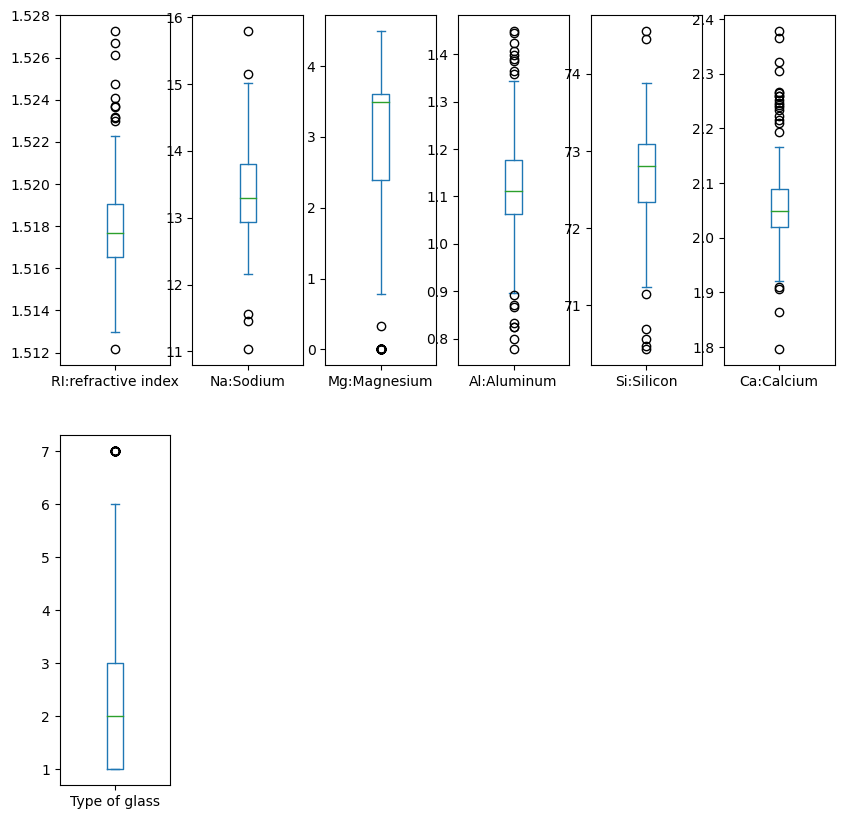

In [734]:
df_new.plot(kind='box',subplots=True, layout=(2,6), figsize=(10,10))

In [735]:
x=df_new.drop("Type of glass",axis=1)
y=df_new["Type of glass"]

# Feature Scaling using Standard Scalarization

In [736]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x


,RI:refractive index,Na:Sodium,Mg:Magnesium,Al:Aluminum,Si:Silicon,Ca:Calcium
0,1.196795,0.315727,1.242867,-0.757524,-1.399149,-0.060735
1,-0.222357,0.671704,0.601049,-0.114325,0.075135,-1.000673
2,-0.819236,0.159097,0.564992,0.284159,0.478624,-1.053821
3,-0.201487,-0.296553,0.665952,-0.278793,-0.111090,-0.593685
4,-0.301663,-0.211119,0.615472,-0.399950,0.618293,-0.748663
5,-0.911063,-0.894594,0.608260,0.451310,0.447586,-0.748663
6,-0.297489,-0.168402,0.601049,-0.652405,0.633812,-0.645133
7,-0.243227,-0.381988,0.608260,-0.892569,0.866593,-0.573164
8,0.432957,0.885290,0.586626,-0.091293,-0.933585,-0.511800
9,-0.247401,-0.595574,0.601049,-0.114325,0.478624,-0.410180


# Checking VIF (Variance Inflation Factor)

In [737]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif=pd.DataFrame()
vif["VIF Values"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif["Features"]=x.columns
vif

,VIF Values,Features
0,4.314518,RI:refractive index
1,2.067295,Na:Sodium
2,5.343421,Mg:Magnesium
3,3.442264,Al:Aluminum
4,2.118441,Si:Silicon
5,4.417319,Ca:Calcium


we have to drop Magnesium column also because this is only one column which has threshold value (5) greater than vif.

In [738]:
x.drop(["Mg:Magnesium"],axis=1,inplace=True)

In [739]:
x

,RI:refractive index,Na:Sodium,Al:Aluminum,Si:Silicon,Ca:Calcium
0,1.196795,0.315727,-0.757524,-1.399149,-0.060735
1,-0.222357,0.671704,-0.114325,0.075135,-1.000673
2,-0.819236,0.159097,0.284159,0.478624,-1.053821
3,-0.201487,-0.296553,-0.278793,-0.111090,-0.593685
4,-0.301663,-0.211119,-0.399950,0.618293,-0.748663
5,-0.911063,-0.894594,0.451310,0.447586,-0.748663
6,-0.297489,-0.168402,-0.652405,0.633812,-0.645133
7,-0.243227,-0.381988,-0.892569,0.866593,-0.573164
8,0.432957,0.885290,-0.091293,-0.933585,-0.511800
9,-0.247401,-0.595574,-0.114325,0.478624,-0.410180


# Finding best Random state

In [740]:
#Finding best Random state
maxAccu=0
maxRS=0
for i in range(1,500):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    dtc=DecisionTreeClassifier()
    dtc.fit(x_train,y_train)
    preddtc=dtc.predict(x_test)
    acc=accuracy_score(y_test,preddtc)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is',maxAccu,'on Random_state',maxRS)

Best accuracy is 0.8360655737704918 on Random_state 79


In [741]:
#creating train test split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=79)

In [742]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
preddtc=dtc.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

0.819672131147541
[[19  1  0  0  0  0]
 [ 3 19  1  0  0  0]
 [ 2  2  1  0  0  0]
 [ 0  0  0  1  0  0]
 [ 0  1  0  0  3  0]
 [ 0  0  0  0  1  7]]
              precision    recall  f1-score   support

           1       0.79      0.95      0.86        20
           2       0.83      0.83      0.83        23
           3       0.50      0.20      0.29         5
           5       1.00      1.00      1.00         1
           6       0.75      0.75      0.75         4
           7       1.00      0.88      0.93         8

    accuracy                           0.82        61
   macro avg       0.81      0.77      0.78        61
weighted avg       0.81      0.82      0.81        61



In [743]:
svc=SVC(kernel='rbf')
svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.6557377049180327
[[18  2  0  0  0  0]
 [10 13  0  0  0  0]
 [ 4  1  0  0  0  0]
 [ 0  0  0  1  0  0]
 [ 0  3  0  0  0  1]
 [ 0  0  0  0  0  8]]
              precision    recall  f1-score   support

           1       0.56      0.90      0.69        20
           2       0.68      0.57      0.62        23
           3       0.00      0.00      0.00         5
           5       1.00      1.00      1.00         1
           6       0.00      0.00      0.00         4
           7       0.89      1.00      0.94         8

    accuracy                           0.66        61
   macro avg       0.52      0.58      0.54        61
weighted avg       0.58      0.66      0.60        61



In [744]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.8524590163934426
[[20  0  0  0  0  0]
 [ 4 19  0  0  0  0]
 [ 3  0  2  0  0  0]
 [ 0  0  0  1  0  0]
 [ 0  2  0  0  2  0]
 [ 0  0  0  0  0  8]]
              precision    recall  f1-score   support

           1       0.74      1.00      0.85        20
           2       0.90      0.83      0.86        23
           3       1.00      0.40      0.57         5
           5       1.00      1.00      1.00         1
           6       1.00      0.50      0.67         4
           7       1.00      1.00      1.00         8

    accuracy                           0.85        61
   macro avg       0.94      0.79      0.83        61
weighted avg       0.88      0.85      0.84        61



In [745]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
predknn=knn.predict(x_test)
print(accuracy_score(y_test,predknn))
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

0.7704918032786885
[[20  0  0  0  0  0]
 [ 5 18  0  0  0  0]
 [ 3  2  0  0  0  0]
 [ 0  1  0  0  0  0]
 [ 1  2  0  0  1  0]
 [ 0  0  0  0  0  8]]
              precision    recall  f1-score   support

           1       0.69      1.00      0.82        20
           2       0.78      0.78      0.78        23
           3       0.00      0.00      0.00         5
           5       0.00      0.00      0.00         1
           6       1.00      0.25      0.40         4
           7       1.00      1.00      1.00         8

    accuracy                           0.77        61
   macro avg       0.58      0.51      0.50        61
weighted avg       0.72      0.77      0.72        61



In [746]:
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier

In [747]:
etc=ExtraTreeClassifier()
etc.fit(x_train,y_train)
predetc=etc.predict(x_test)
print(accuracy_score(y_test,predetc))
print(confusion_matrix(y_test,predetc))
print(classification_report(y_test,predetc))

0.5737704918032787
[[15  4  0  0  0  1]
 [ 7 12  4  0  0  0]
 [ 1  3  1  0  0  0]
 [ 0  0  0  1  0  0]
 [ 2  2  0  0  0  0]
 [ 0  1  0  1  0  6]]
              precision    recall  f1-score   support

           1       0.60      0.75      0.67        20
           2       0.55      0.52      0.53        23
           3       0.20      0.20      0.20         5
           5       0.50      1.00      0.67         1
           6       0.00      0.00      0.00         4
           7       0.86      0.75      0.80         8

    accuracy                           0.57        61
   macro avg       0.45      0.54      0.48        61
weighted avg       0.54      0.57      0.55        61



In [748]:
gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)
predgbc=gbc.predict(x_test)
print(accuracy_score(y_test,predgbc))
print(confusion_matrix(y_test,predgbc))
print(classification_report(y_test,predgbc))

0.819672131147541
[[20  0  0  0  0  0]
 [ 5 18  0  0  0  0]
 [ 2  0  3  0  0  0]
 [ 0  0  0  1  0  0]
 [ 0  4  0  0  0  0]
 [ 0  0  0  0  0  8]]
              precision    recall  f1-score   support

           1       0.74      1.00      0.85        20
           2       0.82      0.78      0.80        23
           3       1.00      0.60      0.75         5
           5       1.00      1.00      1.00         1
           6       0.00      0.00      0.00         4
           7       1.00      1.00      1.00         8

    accuracy                           0.82        61
   macro avg       0.76      0.73      0.73        61
weighted avg       0.78      0.82      0.79        61



In [749]:
abc=AdaBoostClassifier()
abc.fit(x_train,y_train)
predabc=abc.predict(x_test)
print(accuracy_score(y_test,predabc))
print(confusion_matrix(y_test,predabc))
print(classification_report(y_test,predabc))

0.6721311475409836
[[19  1  0  0  0  0]
 [ 9 14  0  0  0  0]
 [ 5  0  0  0  0  0]
 [ 0  1  0  0  0  0]
 [ 0  3  0  1  0  0]
 [ 0  0  0  0  0  8]]
              precision    recall  f1-score   support

           1       0.58      0.95      0.72        20
           2       0.74      0.61      0.67        23
           3       0.00      0.00      0.00         5
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         4
           7       1.00      1.00      1.00         8

    accuracy                           0.67        61
   macro avg       0.39      0.43      0.40        61
weighted avg       0.60      0.67      0.62        61



In [750]:
bc=BaggingClassifier()
bc.fit(x_train,y_train)
predbc=bc.predict(x_test)
print(accuracy_score(y_test,predbc))
print(confusion_matrix(y_test,predbc))
print(classification_report(y_test,predbc))

0.7868852459016393
[[20  0  0  0  0  0]
 [ 8 15  0  0  0  0]
 [ 4  0  1  0  0  0]
 [ 0  0  0  1  0  0]
 [ 0  1  0  0  3  0]
 [ 0  0  0  0  0  8]]
              precision    recall  f1-score   support

           1       0.62      1.00      0.77        20
           2       0.94      0.65      0.77        23
           3       1.00      0.20      0.33         5
           5       1.00      1.00      1.00         1
           6       1.00      0.75      0.86         4
           7       1.00      1.00      1.00         8

    accuracy                           0.79        61
   macro avg       0.93      0.77      0.79        61
weighted avg       0.85      0.79      0.77        61



We are getting highest accuracy with Random Forest Classifier(85%). This may be come due to Overfitting so we will check cross validation scores.

# Cross Validation Score

In [674]:
from sklearn.model_selection import cross_val_score

scr=cross_val_score(dtc,x,y,cv=5)
print(scr)
print(scr.mean())
print("Difference between accuracy score and cross validation score is", accuracy_score(y_test, preddtc)-scr.mean())


[0.51219512 0.65853659 0.675      0.575      0.675     ]
0.6191463414634146
Difference between accuracy score and cross validation score is 0.20052578968412638


In [675]:
scr=cross_val_score(svc,x,y,cv=5)
print(scr)
print(scr.mean())
print("Difference between accuracy score and cross validation score is", accuracy_score(y_test, predsvc)-scr.mean())


[0.6097561  0.75609756 0.675      0.675      0.675     ]
0.678170731707317
Difference between accuracy score and cross validation score is -0.02243302678928427


In [676]:
scr=cross_val_score(rf,x,y,cv=5)
print(scr)
print(scr.mean())
print("Difference between accuracy score and cross validation score is", accuracy_score(y_test, predrf)-scr.mean())


[0.65853659 0.68292683 0.75       0.675      0.725     ]
0.6982926829268293
Difference between accuracy score and cross validation score is 0.1377728908436625


In [677]:
scr=cross_val_score(knn,x,y,cv=5)
print(scr)
print(scr.mean())
print("Difference between accuracy score and cross validation score is", accuracy_score(y_test, predknn)-scr.mean())


[0.56097561 0.85365854 0.65       0.65       0.7       ]
0.6829268292682926
Difference between accuracy score and cross validation score is 0.08756497401039587


In [678]:
scr=cross_val_score(etc,x,y,cv=5)
print(scr)
print(scr.mean())
print("Difference between accuracy score and cross validation score is", accuracy_score(y_test, predetc)-scr.mean())


[0.65853659 0.73170732 0.575      0.425      0.475     ]
0.5730487804878048
Difference between accuracy score and cross validation score is 0.1646561375449821


In [640]:
scr=cross_val_score(gbc,x,y,cv=5)
print(scr)
print(scr.mean())
print("Difference between accuracy score and cross validation score is", accuracy_score(y_test, predgbc)-scr.mean())


[0.65853659 0.68292683 0.725      0.65       0.65      ]
0.6732926829268292
Difference between accuracy score and cross validation score is 0.1463794482207118


In [641]:
scr=cross_val_score(abc,x,y,cv=5)
print(scr)
print(scr.mean())
print("Difference between accuracy score and cross validation score is", accuracy_score(y_test, predabc)-scr.mean())


[0.36585366 0.36585366 0.65       0.35       0.625     ]
0.4713414634146342
Difference between accuracy score and cross validation score is 0.2007896841263494


In [642]:
scr=cross_val_score(bc,x,y,cv=5)
print(scr)
print(scr.mean())
print("Difference between accuracy score and cross validation score is", accuracy_score(y_test, predbc)-scr.mean())


[0.70731707 0.68292683 0.65       0.6        0.675     ]
0.6630487804878049
Difference between accuracy score and cross validation score is 0.05826269492203118


In Support Vector Machine Classifier Model, the difference between accuracy score and cross validation score is .02 . It is the minimum difference,so the best model is Support Vector Classifier.

# HyperParameter Tunning

In [658]:
from sklearn.model_selection import GridSearchCV

In [671]:
#Creating parameters list to pass in GridSearchCV
parameters={'kernel':['linear','rbf'],'C':[1,10]}
svc=SVC()
grid_search=GridSearchCV(svc,parameters)
grid_search.fit(x_train,y_train)
print(grid_search.best_params_)
print(grid_search.best_score_)



{'C': 10, 'kernel': 'rbf'}
0.6669950738916256


In [757]:
final_model=SVC(C=10, kernel="rbf")
final_model.fit(x_train,y_train)
pred=final_model.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc)

0.8360655737704918


In [760]:
import pickle
filename='glass_identification_classification.pkl'
pickle.dump(final_model,open(filename,'wb'))

In [761]:
import pickle
loaded_model=pickle.load(open('glass_identification_classification.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print(result*100)

83.60655737704919


In [763]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],y_test[:]],index=("predicted","original"))
conclusion

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
predicted,1,1,1,2,2,1,2,2,3,2,...,2,7,1,2,1,1,2,1,1,7
original,1,1,1,2,2,1,2,1,3,6,...,2,7,1,2,1,1,2,1,2,7
